Weight,Feature
0.1618 ± 0.0189,sex
0.1062 ± 0.0112,pclass
0.0263 ± 0.0052,age


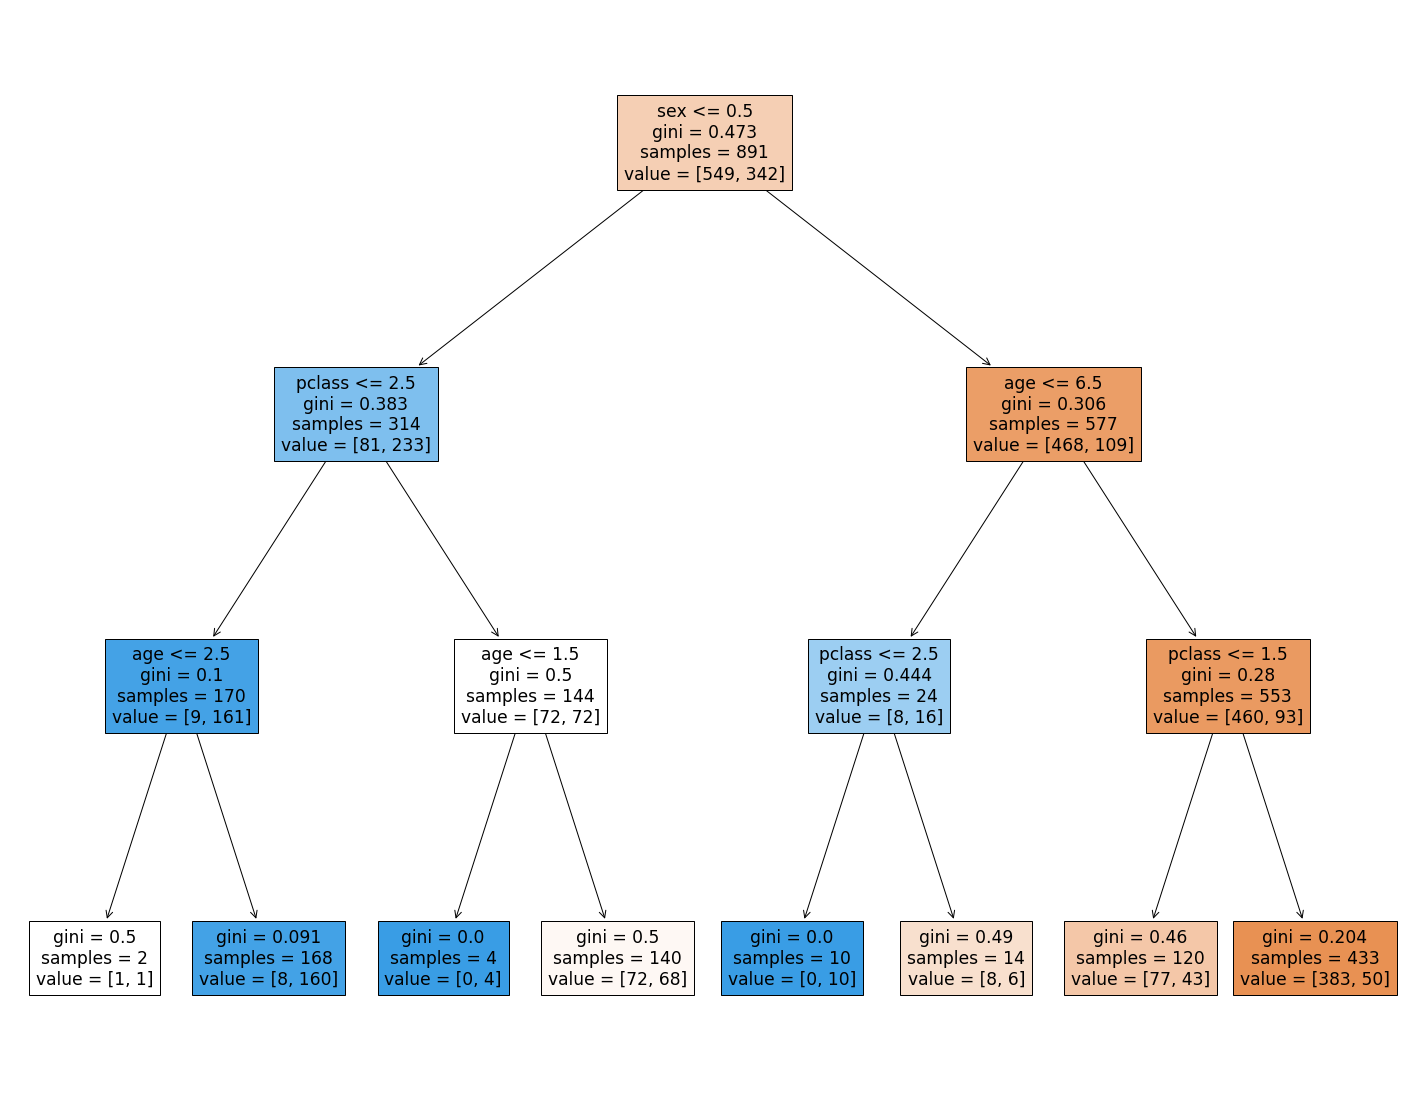

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import eli5
from eli5.sklearn import PermutationImportance

df = pd.read_table('titanic.csv', delimiter=',') # učitavanje podataka

# pretvanja tekstualnih vrijednosti u numeričke vrijednosti  
labelencoder = LabelEncoder()
df.iloc[:,2]= labelencoder.fit_transform(df.iloc[:,2].values)

# adaptiranje neadekvatnih vrijednosti 
value = df['age'].quantile(0.98)
df = df.replace(np.NaN, value)

# podjela skupa podataka na skup značajka i skup oznaka
X_train=df.iloc[:,1:4].values
Y_train=df.iloc[:,0].values

# stvaranje modela stabla odluke 
Decision_Tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
Decision_Tree.fit(X_train, Y_train) # treniranje modela

# iscrtavanje vizualne reprazentacije stable odluke 
fig = plt.figure(figsize=(25,20))
tree.plot_tree(Decision_Tree, feature_names=df.columns[1:4], filled=True)

# ispis tablice važnost permutacija 
perm = PermutationImportance(Decision_Tree, random_state=1).fit(X_train, Y_train)
eli5.show_weights(perm, feature_names=df.iloc[:,1:4].columns.tolist())